## Predicting NBA Player USG%

### 1. Imports & Functions

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import patsy


import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading in DataFrame

In [2]:
# loading in data
full_player_data_df = pd.read_csv("player_data.csv")

In [3]:
pd.set_option("display.max_columns", None)
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420
4,Cole Aldrich,C,28,MIN,25.511685,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,12.7,0.549,0.000,0.256,11.0,23.9,17.4,6.4,2.4,3.7,15.1,9.4,0.6,0.7,1.3,0.116,-2.3,1.5,-0.8,0.2,aldrico01,83.0,250.0,3.0,1.000,0.581,0.407,0.012,0.000,0.000,20,0.243902,0.8134,0.5698,0.0168,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300
1549,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856
1550,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998
1551,Tyler Zeller,C,29,TOT,25.206774,6,1,15.5,2.7,5.0,0.533,0.0,0.2,0.000,2.7,4.8,0.552,0.533,2.3,3.0,0.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,17.3,0.607,0.033,0.600,12.9,15.7,14.2,6.7,0.5,3.1,9.5,20.1,0.2,0.1,0.3,0.167,-3.1,-1.9,-5.0,-0.1,zellety01,84.0,253.0,4.8,0.967,0.433,0.500,0.033,0.000,0.033,76,0.926829,2.1650,2.5000,0.1650,0.0000


In [4]:
full_player_data_df.shape

(1553, 66)

In [5]:
full_player_data_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'BMI', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'player_id', 'Height', 'Weight', 'Dist.', '%2P', '%0-3',
       '%3-10', '%10-16', '%16-3P', '%3P', 'Games_Missed', 'Pct_Games_Missed',
       '0-3_A', '3-10_A', '10-16_A', '16-3P_A'],
      dtype='object')

In [6]:
# adding points per min column
full_player_data_df['PPM'] = (full_player_data_df['G']*full_player_data_df['PTS']) / (full_player_data_df['G']*full_player_data_df['MP'])

In [7]:
full_player_data_df

,Player,Pos,Age,Tm,BMI,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,Height,Weight,Dist.,%2P,%0-3,%3-10,%10-16,%16-3P,%3P,Games_Missed,Pct_Games_Missed,0-3_A,3-10_A,10-16_A,16-3P_A,PPM
0,Álex Abrines,SG,23,OKC,23.109796,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,abrinal01,78.0,200.0,20.6,0.276,0.120,0.047,0.044,0.065,0.724,14,0.170732,0.6000,0.2350,0.2200,0.3250,0.387097
1,Steven Adams,C,23,OKC,27.042386,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,adamsst01,83.0,265.0,3.7,0.998,0.557,0.388,0.046,0.005,0.002,2,0.024390,4.5674,3.1816,0.3772,0.0410,0.377926
2,Arron Afflalo,SG,31,SAC,24.899646,61,45,25.9,3.0,6.9,0.440,1.0,2.5,0.411,2.0,4.4,0.457,0.514,1.4,1.5,0.892,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,afflaar01,77.0,210.0,16.8,0.640,0.100,0.117,0.186,0.236,0.360,21,0.256098,0.6900,0.8073,1.2834,1.6284,0.324324
3,Alexis Ajinça,C,28,NOP,23.572742,39,15,15.0,2.3,4.6,0.500,0.0,0.1,0.000,2.3,4.5,0.511,0.500,0.7,1.0,0.725,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,12.9,0.529,0.022,0.225,8.3,23.8,16.0,3.1,1.7,3.1,13.7,17.2,0.0,0.9,1.0,0.080,-4.0,0.7,-3.3,-0.2,ajincal01,86.0,248.0,9.0,0.978,0.348,0.253,0.107,0.270,0.022,43,0.524390,1.6008,1.1638,0.4922,1.2420,0.353333
4,Cole Aldrich,C,28,MIN,25.511685,62,0,8.6,0.7,1.4,0.523,0.0,0.0,0.000,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,12.7,0.549,0.000,0.256,11.0,23.9,17.4,6.4,2.4,3.7,15.1,9.4,0.6,0.7,1.3,0.116,-2.3,1.5,-0.8,0.2,aldrico01,83.0,250.0,3.0,1.000,0.581,0.407,0.012,0.000,0.000,20,0.243902,0.8134,0.5698,0.0168,0.0000,0.197674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Jonas Valančiūnas,C,26,TOT,27.042386,49,27,22.3,6.1,11.0,0.559,0.3,1.0,0.292,5.9,10.0,0.586,0.572,3.0,3.8,0.795,2.2,6.4,8.6,1.4,0.4,1.1,1.8,3.0,15.6,24.4,0.616,0.089,0.344,10.7,31.4,21.1,12.0,0.8,4.4,12.7,28.5,2.2,1.9,4.2,0.183,2.2,0.4,2.6,1.3,valanjo01,83.0,265.0,7.0,0.911,0.390,0.375,0.115,0.030,0.089,33,0.402439,4.2900,4.1250,1.2650,0.3300,0.699552
1549,Christian Wood,PF,23,TOT,22.373885,21,2,12.0,2.9,5.6,0.521,0.4,1.2,0.346,2.5,4.3,0.571,0.560,2.0,2.7,0.732,0.8,3.1,4.0,0.4,0.3,0.5,0.8,0.8,8.2,21.9,0.607,0.222,0.479,7.2,26.5,17.0,4.8,1.3,3.2,10.7,26.1,0.4,0.3,0.8,0.151,1.4,-1.0,0.4,0.1,woodch01,82.0,214.0,9.2,0.778,0.427,0.248,0.051,0.051,0.222,61,0.743902,2.3912,1.3888,0.2856,0.2856,0.683333
1550,Delon Wright,PG,26,TOT,21.935402,75,13,22.7,3.2,7.4,0.434,0.7,2.2,0.298,2.6,5.2,0.492,0.478,1.6,2.0,0.793,0.9,2.6,3.5,3.3,1.2,0.4,1.0,1.4,8.7,15.5,0.523,0.301,0.269,4.4,12.8,8.6,21.6,2.5,1.6,11.0,18.1,1.9,2.4,4.3,0.121,0.1,1.4,1.5,1.5,wrighde01,77.0,185.0,10.8,0.699,0.401,0.206,0.065,0.027,0.301,7,0.085366,2.9674,1.5244,0.4810,0.1998,0.383260
1551,Tyler Zeller,C,29,TOT,25.206774,6,1,15.5,2.7,5.0,0.533,0.0,0.2,0.000,2.7,4.8,0.552,0.533,2.3,3.0,0.778,1.8,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,17.3,0.607,0.033,0.600,12.9,15.7,14.2,6.7,0.5,3.1,9.5,20.1,0.2,0.1,0.3,0.167,-3.1,-1.9,-5.0,-0.1,zellety01,84.0,253.0,4.8,0.967,0.433,0.500,0.033,0.000,0.033,76,0.926829,2.1650,2.5000,0.1650,0.0000,0.496774


### 3. EDA

In [32]:
# subset = ['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PPM', 'AST', 'ORB','DRB', 
#                    'TRB','STL', 'BLK', 'PF','Dist.', 'Games_Missed']
subset = ['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PPM', 'AST', 'ORB','DRB', 
                   'TRB','STL', 'BLK', 'PF','Dist.','%2P', '%0-3','%3-10', '%10-16', '%16-3P', '%3P', 'Games_Missed', 
                   'OWS', 'DWS', 'WS']
player_usg_df = full_player_data_df.loc[:,subset]

player_usg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USG%          1553 non-null   float64
 1   Age           1553 non-null   int64  
 2   Height        1553 non-null   float64
 3   Weight        1553 non-null   float64
 4   BMI           1553 non-null   float64
 5   FG%           1553 non-null   float64
 6   3P%           1553 non-null   float64
 7   2P%           1553 non-null   float64
 8   FT%           1553 non-null   float64
 9   PPM           1553 non-null   float64
 10  AST           1553 non-null   float64
 11  ORB           1553 non-null   float64
 12  DRB           1553 non-null   float64
 13  TRB           1553 non-null   float64
 14  STL           1553 non-null   float64
 15  BLK           1553 non-null   float64
 16  PF            1553 non-null   float64
 17  Dist.         1553 non-null   float64
 18  %2P           1553 non-null 

In [40]:
lm = LinearRegression

# features, target = ['Age', 'Height', 'Weight', 'BMI', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 
#                     'FT', 'FTA','FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Dist.','%2P', 
#                     '%0-3','%3-10', '%10-16', '%16-3P', '%3P', '0-3_A', '3-10_A', '10-16_A', '16-3P_A'],'USG%'

features,target = subset[1:],'USG%'



X,y = player_usg_df[features], player_usg_df[target]
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X,y) # fit model to our choice of features

lm.score(X,y)

0.8215211445891265

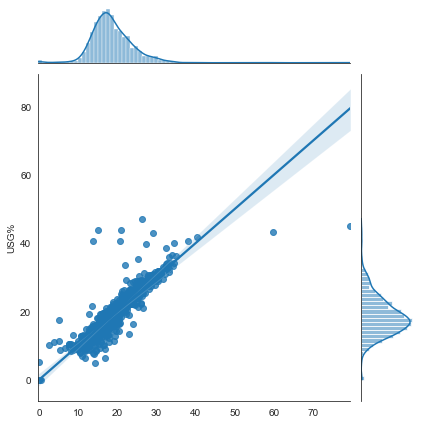

In [34]:
preds = lm.predict(X)
sns.set_style('white')
sns.jointplot(x=preds,y=y, kind='reg')

In [ ]:
sns.pairplot(player_usg_df,height=1.2, aspect=1.5);

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

## Cross Validation

#### Manual K-Fold Loop

In [35]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [41]:
X,y = player_usg_df.drop('USG%', axis=1), player_usg_df['USG%']

X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state=24)

X, y = np.array(X), np.array(y)

In [42]:
X

array([[2.50e+01, 7.80e+01, 2.30e+02, ..., 1.00e-01, 4.00e-01, 4.00e-01],
       [2.50e+01, 8.50e+01, 2.58e+02, ..., 4.20e+00, 3.90e+00, 8.10e+00],
       [3.10e+01, 8.00e+01, 2.30e+02, ..., 1.00e+00, 9.00e-01, 1.90e+00],
       ...,
       [2.20e+01, 7.30e+01, 2.01e+02, ..., 1.00e-01, 0.00e+00, 1.00e-01],
       [2.20e+01, 7.60e+01, 1.96e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.60e+01, 8.40e+01, 2.31e+02, ..., 1.00e+00, 9.00e-01, 1.80e+00]])

In [48]:
# running the CV
kf = KFold(n_splits=5, shuffle=True, random_state=24)

cv_lm_r2s, cv_lm_reg_r2s = [],[]
cv_lm_r2s_tr, cv_lm_reg_r2s_tr = [],[]
    
for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # Simple Linear Regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    # Ridge Regression & Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s)

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}','\n')


print('Simple regression scores (tr): ', cv_lm_r2s_tr)
print('Ridge scores (tr): ', cv_lm_reg_r2s_tr)

print(f'Simple mean cv r^2_tr: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print(f'Ridge mean cv r^2_tr: {np.mean(cv_lm_reg_r2s_tr):.3f} +- {np.std(cv_lm_reg_r2s_tr):.3f}')

Simple regression scores:  [0.7129124586001713, 0.6579069632804928, 0.7942214645485626, 0.8669984051782851, 0.8666649606945608]
Ridge scores:  [0.7115663423567145, 0.6613201003543301, 0.7950171248206217, 0.8685974439641511, 0.8694699229304659]
Simple mean cv r^2: 0.780 +- 0.083
Ridge mean cv r^2: 0.781 +- 0.083 

Simple regression scores (tr):  [0.8367911784016813, 0.8434950375512931, 0.8169848402780816, 0.802600136997083, 0.8001520262384378]
Ridge scores (tr):  [0.8358970913903414, 0.8423176057323055, 0.8158753056771699, 0.801683366590592, 0.7997785501805537]
Simple mean cv r^2_tr: 0.820 +- 0.018
Ridge mean cv r^2_tr: 0.819 +- 0.017


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression Test R2: {lm_reg.score(X_test_scaled, y_test):.3f}')

#### K-Fold Using Sklearn

In [10]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, cv=5, scoring='r2')

NameError: name 'X' is not defined

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=32)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 824)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

## Feature Engineering

In [ ]:
X,y = player_usg_df.drop('USG%', axis=1), player_usg_df['USG%']

In [ ]:
def SSE(actuals,preds):
    return np.sum((actuals-preds)**2)
def RMSE(actuals,preds):
    return np.sqrt(np.mean((actuals-preds)**2))
def MAE(actuals,preds):
    return np.mean(np.abs(actuals-preds))

In [ ]:
def split_and_validate(X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=32)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    val_score = lm.score(X_val, y_val)
    
    print('Val R2 Score: ', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lm.coef_):
        print(f'{feature}: {coef:.2f}')

In [ ]:
split_and_validate(X,y)

### Adding Polynomial Terms

In [ ]:
np.any(np.isnan(X2))

In [ ]:
np.all(np.isfinite(X2))

In [ ]:
import numpy as np
X2 = X.copy()
# X2['PPM2'] = (X2['PPM'])**2
# X2['WS2'] = (X2['WS'])**2
# X2['AST2'] = (X2['AST'])**2
# X2['STL2'] = (X2['STL'])**2
# X2['DRB2'] = (X2['DRB'])**2
# X2['ORB2'] = (X2['ORB'])**2

X2['PPM_x_FG%'] = X2['PPM']*X2['FG%']
X2['Height_x_FG%'] = X2['Height']*X2['FG%']

# X2['PPM_x_3P%'] = X2['PPM']*X2['3P%']
# X2['PPM_x_2P%'] = X2['PPM']*X2['2P%']

split_and_validate(X2,y)

### Benchmarks:

1. Baseline feature set: ~ 0.83 R^2
2. Add polynomial transformations for PPM (Points Per Min) * FG% and Height * FG%: ~0.87 R^2

Potential Category Features: Position
- position and 3P% may be a very valuable relationship to consider
- generally, guards are expected to be able shoot outside efficiently
- however, forwards and centers are less expected to be strong 3 point shooters
- forwards and centers who are able to shoot outside efficiently may be valued much higher than their counterparts
- therefore possibly leading to higher usage rates

Notes:
- PPM^2 improved the R^2 to just below 0.88, but for the sake of comprehensibility, I have used the aforementioned transformations instead

In [ ]:
# player_usg_data = full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PPM', 
#                                        'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
#                                        '%0-3','%3-10', '%10-16', '%16-3P', '%3P']]

In [ ]:
# extract feature coefficients & intercept from fit model
print(lm.intercept_)
print(lm.coef_)

In [ ]:
usg_model = sm.OLS(y, X, data=full_player_data_df)
results = usg_model.fit()

results.summary()

In [ ]:
def SSE(actuals,preds):
    return np.sum((actuals-preds)**2)

SSE(y,preds)

In [ ]:
def RMSE(actuals,preds):
    return np.sqrt(np.mean((actuals-preds)**2))

RMSE(y,preds)

In [ ]:
def MAE(actuals,preds):
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

## R-squared

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

In [ ]:
lm.score(X,y)

In [ ]:
X = player_usg_data.drop(columns=['USG%']).astype(float)

y = player_usg_data.loc[:,'USG%'].astype(float)

In [ ]:
usg_model = sm.OLS(y, X, data=player_usg_data)
results = usg_model.fit()

results.summary()

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_data.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(player_usg_data.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1);

In [ ]:
sns.pairplot(player_usg_data, height=1.2, aspect=1.5).savefig("usg_pairplot.png")

In [ ]:
usg_model = sm.OLS(y, X, data=full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']])
results = usg_model.fit()

results.summary()

In [ ]:
target_features = full_player_data_df[['USG%','Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']]

plt.subplots(figsize=(25,25))
sns.heatmap(target_features.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [ ]:
# using sklearn

lr1 = LinearRegression()

X = full_player_data_df[['Age', 'Height', 'Weight', 'BMI', 'FG%', '3P%', '2P%', 'FT%', 'PER', 
                                       'AST', 'ORB','DRB', 'TRB','STL', 'BLK', 'PF','Dist.','%2P', 
                                       '%0-3','%3-10', '%10-16', '%16-3P', '%3P']]
y = full_player_data_df['USG%']

lr1.fit(X,y)

lr1.score(X,y)

In [ ]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PER + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
                       data=full_player_data_df,return_type="dataframe")

# Create your model
usg_model = sm.OLS(y, X)

# Fit your model to your training set
fit = usg_model.fit()

# Print summary statistics of the model's performance
fit.summary()

In [ ]:
# Defining model
lm1 = smf.ols("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PPM + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
              data=full_player_data_df)

# Fitting the model
fit1 = lm1.fit()

# Print summary of model performance
fit1.summary()

In [ ]:
# Defining model
lm2 = smf.ols("Q('USG%') ~ Age +  Height  + Weight + BMI + Q('FG%') + Q('3P%') + Q('2P%') + Q('FT%') + PER + AST + ORB + DRB + TRB + STL + BLK + PF + Q('Dist.') + Q('%2P') + Q('%0-3') + Q('%3-10') + Q('%10-16') + Q('%16-3P') + Q('%3P')", 
              data=full_player_data_df)

# Fitting the model
fit2 = lm2.fit()

# Print summary of model performance
fit2.summary()